<a href="https://colab.research.google.com/github/Pournima-k-25/HOSPITAL-/blob/main/copy_of_untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Neural Network Model
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

# Data Preprocessing
import re
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create test and train
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Accuracy
from sklearn.metrics import accuracy_score, make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score

# Visualization Libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import urllib.request

In [ ]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/bbc-news-data.csv'

In [ ]:
local_file,headers = urllib.request.urlretrieve(url)

In [ ]:
df_news = pd.read_csv(local_file, sep='\t')

In [ ]:
df_news

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
df_news.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
df_news['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [ ]:
df_news = pd.DataFrame(df_news, columns=['category', 'title', 'content'])
print(df_news.head())
print('\nShape of data is {}\n'.format(df_news.shape))
print(df_news.info())

   category                              title  \
0  business  Ad sales boost Time Warner profit   
1  business   Dollar gains on Greenspan speech   
2  business  Yukos unit buyer faces loan claim   
3  business  High fuel prices hit BA's profits   
4  business  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...  

Shape of data is (2225, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   title     2225 non-null   object
 2   content   2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB
Non

In [ ]:
tags_values = df_news['category'].value_counts()
tags_values

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
px.pie(df_news.category.value_counts().to_frame().reset_index(),
       values='category',names='index',
       color_discrete_sequence=px.colors.sequential.Darkmint,
      title = 'Count and frequency news category in DataFrame',
      labels={'category':'count','index':'category'})


In [ ]:
df_news['category_id'] =df_news.category.factorize()[0]

In [ ]:
category_id_df =df_news[['category','category_id']].drop_duplicates().sort_values('category_id')

In [ ]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','category']].values)

In [ ]:
pd.DataFrame(df_news.category.value_counts()).rename(columns={'category':'Count'}).style.bar(color='#137a63')

,Count
sport,511
business,510
politics,417
tech,401
entertainment,386


In [ ]:
df_news.drop_duplicates(subset=['category','title'],inplace=True)

In [ ]:
df_news['text'] = df_news['title']+ ' ' + df_news['content']

In [ ]:
def clean_text(text):
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text
df_news['clean_text'] = df_news['text'].apply(clean_text)

In [ ]:
heading_sport = df_news[df_news["category"]=="sport"]["title"] # Extract only heading of emails for Ham tags
collapsed_heading_sport = heading_sport.str.cat(sep=' ')
heading_business  = df_news[df_news["category"]=="sport"]["title"] # Extract only heading of emails for Ham tags
collapsed_heading_business = heading_sport.str.cat(sep=' ')
heading_politics  = df_news[df_news["category"]=="sport"]["title"] # Extract only heading of emails for Ham tags
collapsed_heading_politics = heading_sport.str.cat(sep=' ')
heading_tech  = df_news[df_news["category"]=="sport"]["title"] # Extract only heading of emails for Ham tags
collapsed_heading_tech = heading_sport.str.cat(sep=' ')
heading_entertainment  = df_news[df_news["category"]=="sport"]["title"] # Extract only heading of emails for Ham tags
collapsed_heading_entertainment = heading_sport.str.cat(sep=' ')

Word Cloud for sport


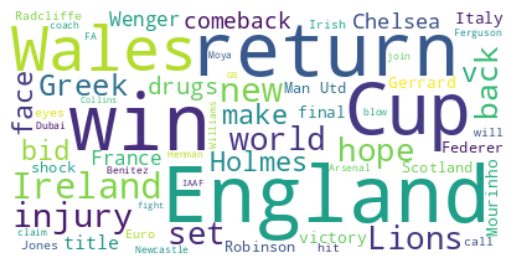

Word Cloud for business


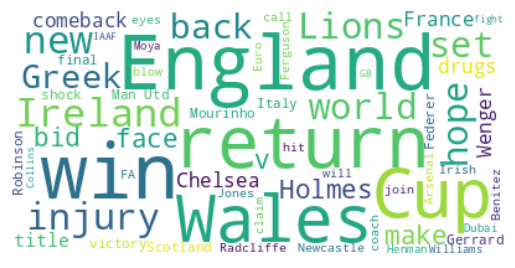

Word Cloud for politics


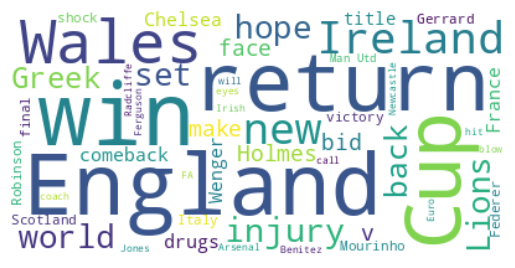

Word Cloud for tech


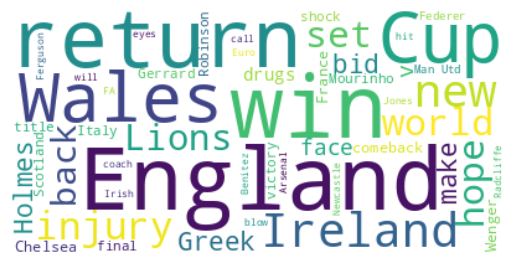

Word Cloud for entertainment


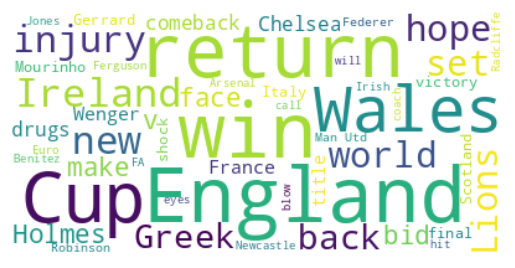

In [ ]:
stopwords=set(STOPWORDS)
print("Word Cloud for sport")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 60).generate(collapsed_heading_sport)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for business")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 60).generate(collapsed_heading_business)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for politics")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_politics)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()


print("Word Cloud for tech")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_tech)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

print("Word Cloud for entertainment")

# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,background_color = "white",max_words = 50).generate(collapsed_heading_entertainment)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_news.clean_text)
sequences = tokenizer.texts_to_sequences(df_news.clean_text)
text = pad_sequences(sequences)
labels = df_news.category_id.astype('float32')

In [ ]:
tokenizer.word_index['said']

13

In [ ]:
reverse_word_index = dict([(value,key) for (key,value) in tokenizer.word_index.items()])

In [ ]:
reverse_word_index[13]

'the'

In [ ]:
' '.join([reverse_word_index.get(i,'') for i in text[0]])

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
df_news['clean_text'][0]

'ad sales boost time warner profit quarterly profits at us media giant timewarner jumped to bn m for the three months to december from m year earlier the firm which is now one of the biggest investors in google benefited from sales of high speed internet connections and higher advert sales timewarner said fourth quarter sales rose to bn from bn its profits were buoyed by one off gains which offset a profit dip at warner bros and less users for aol time warner said on friday that it now owns of search engine google but its own internet business aol had has mixed fortunes it lost subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aol s underlying profit before exceptional items rose on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol s existing customers for high speed broadband timewarner also 

In [ ]:
def vectorize_sequence(sequnce,dimension=10000):
    results = np.zeros((len(sequnce),dimension))
    for i,sequnce in enumerate(sequnce):
        results[i,sequnce] = 1
    return results
vectorizer = vectorize_sequence(text)

In [ ]:
vectorizer[0]

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
vec = TfidfVectorizer(max_features=10000)
features = vec.fit_transform(df_news.clean_text).toarray()
labels = df_news.category_id
print(type(features),features.shape)

<class 'numpy.ndarray'> (2096, 10000)


In [ ]:
from sklearn.feature_selection import chi2
N = 3
for category,category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features,labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array (vec.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

AttributeError: ignored

In [ ]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df_news,df_news['category_id']):
    strat_train_set = df_news.iloc[train_index]
    strat_test_set = df_news.iloc[test_index]

In [ ]:
X_train = strat_train_set['clean_text']
y_train = strat_train_set['category_id']

In [ ]:
X_test = strat_test_set['clean_text']
y_test = strat_test_set['category_id']

In [ ]:
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)

In [ ]:
Xtrain_tfidf = vec.fit_transform(X_train)
Xtest_tfidf = vec.fit_transform(X_test)

In [ ]:
Xtrain_vectorize = vectorize_sequence(text[train_index])
Xtest_vectorize = vectorize_sequence(text[test_index])

In [ ]:
perform_list = []
def run_model(model_name,X_train,X_test,process):
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Linear SVC':
        mdl = LinearSVC()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100,criterion='entropy')
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB()
    mdl.fit(X_train,y_train)
    y_pred = mdl.predict(X_test)

    # Performance metrics
    acc = round(accuracy_score(y_test,y_pred) * 100,2)
    precision,recall,f1score,support = score(y_test,y_pred,average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {acc}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(acc, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2)),
        ('process',process)
            ]))

In [ ]:
run_model('Random Forest',Xtrain_tfidf,Xtest_tfidf,'tfidf')

Test Accuracy Score of Basic Random Forest: % 23.1
Precision : 0.23095238095238096
Recall    : 0.23095238095238096
F1-score   : 0.23095238095238096


In [ ]:
run_model('Random Forest',Xtrain_vectorize,Xtest_vectorize,'vectorize')

Test Accuracy Score of Basic Random Forest: % 97.38
Precision : 0.9738095238095238
Recall    : 0.9738095238095238
F1-score   : 0.9738095238095238


In [ ]:
run_model('Logistic Regression',Xtrain_tfidf,Xtest_tfidf,'tfidf')

Test Accuracy Score of Basic Logistic Regression: % 26.9
Precision : 0.26904761904761904
Recall    : 0.26904761904761904
F1-score   : 0.26904761904761904


In [ ]:
run_model('Logistic Regression',Xtrain_vectorize,Xtest_vectorize,'vectorize')

Test Accuracy Score of Basic Logistic Regression: % 97.38
Precision : 0.9738095238095238
Recall    : 0.9738095238095238
F1-score   : 0.9738095238095238


In [ ]:
run_model('Multinomial Naive Bayes',Xtrain_tfidf,Xtest_tfidf,'tfidf')

Test Accuracy Score of Basic Multinomial Naive Bayes: % 20.95
Precision : 0.20952380952380953
Recall    : 0.20952380952380953
F1-score   : 0.20952380952380953


In [ ]:
run_model('Multinomial Naive Bayes',Xtrain_vectorize,Xtest_vectorize,'vectorize')

Test Accuracy Score of Basic Multinomial Naive Bayes: % 96.19
Precision : 0.9619047619047619
Recall    : 0.9619047619047619
F1-score   : 0.9619047619047619


In [ ]:
run_model('Linear SVC',Xtrain_tfidf,Xtest_tfidf,'tfidf')

Test Accuracy Score of Basic Linear SVC: % 26.67
Precision : 0.26666666666666666
Recall    : 0.26666666666666666
F1-score   : 0.26666666666666666


In [ ]:
run_model('Linear SVC',Xtrain_vectorize,Xtest_vectorize,'vectorize')

Test Accuracy Score of Basic Linear SVC: % 97.38
Precision : 0.9738095238095238
Recall    : 0.9738095238095238
F1-score   : 0.9738095238095238


In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1','process']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1,process
0,Random Forest,23.10,0.23,0.23,0.23,tfidf
1,Random Forest,97.38,0.97,0.97,0.97,vectorize
2,Logistic Regression,26.90,0.27,0.27,0.27,tfidf
3,Logistic Regression,97.38,0.97,0.97,0.97,vectorize
4,Multinomial Naive Bayes,20.95,0.21,0.21,0.21,tfidf
5,Multinomial Naive Bayes,96.19,0.96,0.96,0.96,vectorize
6,Linear SVC,26.67,0.27,0.27,0.27,tfidf
7,Linear SVC,97.38,0.97,0.97,0.97,vectorize
